# Classification Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import itertools
import pickle
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df_final = pd.read_pickle('df_final_edadmit.plk')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_final.head()

,disposition,age,n_admissions,n_edvisits,n_surgeries,chfnonhp,chrkidneydisease,copd,coronathero,diabmelnoc,dysrhythmia,esophgealdx,htn,hyperlipidem,meds_analgesics,meds_antiasthmatics,meds_antihyperglycemics,meds_antiplateletdrugs,meds_cardiacdrugs,meds_cardiovascular,meds_diuretics,meds_elect/caloric/h2o,meds_gastrointestinal,meds_psychotherapeuticdrugs,meds_vitamins,cc_abdominalpain,cc_chestpain,cc_emesis,cc_shortnessofbreath,cc_alteredmentalstatus,cc_weakness,cc_alcoholintoxication,cc_backpain,cc_motorvehiclecrash,cc_sorethroat,cc_kneepain,cc_rash,bloodua_npos,leukocytesua_npos,proteinua_npos,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_temp,cxr_count,echo_count,ekg_count,headct_count,mri_count,otherct_count,otherus_count,esi_1.0,esi_2.0,esi_3.0,esi_4.0,esi_5.0,gender_Female,gender_Male,arrivalmode_ambulance,previousdispo_Admit,previousdispo_Discharge
0,0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,63.0,146.0,85.0,18.0,97.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,66.0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,83.0,125.0,77.0,16.0,98.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,66.0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,78.0,134.0,78.0,16.0,97.8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,1,84.0,0,1,5,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,1,2,2,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,101.0,133.0,72.0,18.0,98.4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
5,0,86.0,0,0,10,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,76.0,143.0,87.0,18.0,98.5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368095 entries, 0 to 560484
Data columns (total 62 columns):
disposition                    368095 non-null object
age                            368095 non-null float64
n_admissions                   368095 non-null int64
n_edvisits                     368095 non-null int64
n_surgeries                    368095 non-null int64
chfnonhp                       368095 non-null int64
chrkidneydisease               368095 non-null int64
copd                           368095 non-null int64
coronathero                    368095 non-null int64
diabmelnoc                     368095 non-null int64
dysrhythmia                    368095 non-null int64
esophgealdx                    368095 non-null int64
htn                            368095 non-null int64
hyperlipidem                   368095 non-null int64
meds_analgesics                368095 non-null int64
meds_antiasthmatics            368095 non-null int64
meds_antihyperglycemics        368095 

## Define input columns (X)

In [6]:
X = df_final.iloc[:,1:62]

In [7]:
X

,age,n_admissions,n_edvisits,n_surgeries,chfnonhp,chrkidneydisease,copd,coronathero,diabmelnoc,dysrhythmia,esophgealdx,htn,hyperlipidem,meds_analgesics,meds_antiasthmatics,meds_antihyperglycemics,meds_antiplateletdrugs,meds_cardiacdrugs,meds_cardiovascular,meds_diuretics,meds_elect/caloric/h2o,meds_gastrointestinal,meds_psychotherapeuticdrugs,meds_vitamins,cc_abdominalpain,cc_chestpain,cc_emesis,cc_shortnessofbreath,cc_alteredmentalstatus,cc_weakness,cc_alcoholintoxication,cc_backpain,cc_motorvehiclecrash,cc_sorethroat,cc_kneepain,cc_rash,bloodua_npos,leukocytesua_npos,proteinua_npos,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_temp,cxr_count,echo_count,ekg_count,headct_count,mri_count,otherct_count,otherus_count,esi_1.0,esi_2.0,esi_3.0,esi_4.0,esi_5.0,gender_Female,gender_Male,arrivalmode_ambulance,previousdispo_Admit,previousdispo_Discharge
0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,63.0,146.0,85.0,18.0,97.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,66.0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,83.0,125.0,77.0,16.0,98.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,66.0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,78.0,134.0,78.0,16.0,97.8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,84.0,0,1,5,0,0,0,0,0,0,1,1,1,0,0,0,0,0,2,1,2,2,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,101.0,133.0,72.0,18.0,98.4,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
5,86.0,0,0,10,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,76.0,143.0,87.0,18.0,98.5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560478,49.0,1,1,8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,71.0,117.0,74.0,16.0,98.0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0
560480,49.0,1,3,8,1,0,0,0,1,1,0,0,0,2,2,2,0,2,0,2,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,89.0,114.0,75.0,16.0,98.1,1,0,2,1,0,0,0,0,0,1,0,0,0,1,1,0,1
560482,50.0,3,5,8,1,0,0,0,1,1,0,0,0,1,2,2,0,2,0,2,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,89.0,125.0,82.0,18.0,97.5,3,0,4,1,0,0,0,0,0,1,0,0,0,1,1,1,0
560483,50.0,4,6,8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,89.0,135.0,92.0,18.0,97.5,3,0,5,1,0,0,0,0,0,1,0,0,0,1,1,1,0


## Define output column (y)

In [8]:
y = df_final.iloc[:,0]

In [9]:
y=y.astype('int')

In [10]:
y

0         0
1         0
2         0
4         1
5         0
         ..
560478    0
560480    1
560482    1
560483    0
560484    1
Name: disposition, Length: 368095, dtype: int64

## Train-Test Split 80%/20%

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2, stratify=y)
# train on 80% of data
# leave 20% for final test

## Cross Validation

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
def cv_stkfold(modelfunction):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 22)
    trainscore_auc, valscore_auc = [], [] 
    trainscore_accur, valscore_accur = [], []

    for train_ind, val_ind in kf.split(X_train,y_train):
    
        X_train_kf, y_train_kf = X_train[train_ind], y_train[train_ind]
        X_val, y_val = X_train[val_ind], y_train[val_ind] 

        modelfunction.fit(X_train_kf, y_train_kf)
        
        trainscore_auc.append(roc_auc_score(y_train_kf,modelfunction.predict(X_train_kf)))
        valscore_auc.append(roc_auc_score(y_val,modelfunction.predict(X_val)))
        
        trainscore_accur.append(accuracy_score(y_train_kf,modelfunction.predict(X_train_kf)))
        valscore_accur.append(accuracy_score(y_val,modelfunction.predict(X_val)))
    

    print('Train roc_auc scores: ', trainscore_auc)
    print('Val roc_auc scores: ', valscore_auc)
    
    print('Train accuracy scores: ', trainscore_accur)
    print('Val accuracy scores: ', valscore_accur)  

### Random Forest

In [14]:
cv_stkfold(RandomForestClassifier())
# random forest seems to be overfitting on the training set

Train roc_auc scores:  [0.9745160910100167, 0.974624776100452, 0.9732280174101553, 0.9742756038550779, 0.9729663323461238]
Val roc_auc scores:  [0.7619473125838281, 0.7612796536768613, 0.7610502867236171, 0.7636177202671787, 0.7640663818527644]
Train accuracy scores:  [0.9877451396553187, 0.9877239675525615, 0.9870575301064177, 0.9874438091357113, 0.9869514094939744]
Val accuracy scores:  [0.8665613963596849, 0.8673741404193904, 0.8663893369555989, 0.8674929960098481, 0.8679853977417438]


#### Hyperparameter tuning

In [15]:
cv_stkfold(RandomForestClassifier(n_estimators = 150, max_depth=15, class_weight='balanced'))

Train roc_auc scores:  [0.8275077370544776, 0.8280534432378381, 0.8283343275758493, 0.8277992487013176, 0.8281010358950065]
Val roc_auc scores:  [0.8142464266031431, 0.8150707451526528, 0.8100448460252732, 0.8126977949279552, 0.8130630493900673]
Train accuracy scores:  [0.8487435266151626, 0.8510321290766233, 0.8496270921678744, 0.851006660129637, 0.8514608563508942]
Val accuracy scores:  [0.8389873675631622, 0.8408184056371508, 0.836013243908651, 0.8396977672128364, 0.840733508786824]


In [16]:
randomized_classifier = RandomForestClassifier()

In [17]:
m_params = {'bootstrap': [True, False],
               'max_depth': [10, 15, 20, 30, 40, 50, 60, 70, 80],
               'max_features': ['auto', 'sqrt', 'log2'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 150, 200],
                'class_weight':['balanced',None]}

In [19]:
random_search = RandomizedSearchCV(randomized_classifier,
                                       param_distributions = m_params, 
                                       n_iter = 5,
                                       random_state = 42,
                                       cv = 3,
                                        verbose = 0) 

In [20]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [21]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
cv_stkfold(RandomForestClassifier(bootstrap= False, n_estimators = 200, max_depth=50, max_features='sqrt', min_samples_split=2))

Train roc_auc scores:  [0.9986868204525419, 0.9988245881467062, 0.9984205403221362, 0.9983378941762016, 0.9984940035629672]
Val roc_auc scores:  [0.7806791789828859, 0.7824809628186792, 0.7797652811295489, 0.7812927290857523, 0.7815133426835273]
Train accuracy scores:  [0.999392987520163, 0.9994566624642904, 0.9992698901863902, 0.9992316867659107, 0.9993038487823721]
Val accuracy scores:  [0.8751018744906276, 0.8768656082859326, 0.8749808982086764, 0.8753544443501146, 0.8755751761609645]


### Logistic Regression

In [23]:
cv_stkfold(LogisticRegression())

Train roc_auc scores:  [0.7569337238169705, 0.7577042911963561, 0.7578640071897351, 0.7578825948513701, 0.7577111573864977]
Val roc_auc scores:  [0.758739782919656, 0.7568864669727258, 0.7577986589239686, 0.7582336409074198, 0.755932086784564]
Train accuracy scores:  [0.8695602343153069, 0.8697220913401336, 0.8697602947606131, 0.869887639495545, 0.8699598015120065]
Val accuracy scores:  [0.8702798152675904, 0.8693097886068427, 0.8703964682910263, 0.8694456235673657, 0.8692248917565158]


#### Hyperparameter tuning

In [24]:
cv_stkfold(LogisticRegression(solver='liblinear',class_weight='balanced'))

Train roc_auc scores:  [0.8138390399089348, 0.8131934913133345, 0.8140164428458381, 0.8137668817392418, 0.813636170741396]
Val roc_auc scores:  [0.8126877446074301, 0.8146792411693675, 0.8125812335884928, 0.8134349197698147, 0.8140635455092621]
Train accuracy scores:  [0.8267170387978606, 0.8263739435693032, 0.8273332739057904, 0.8268408742640535, 0.8271040533829129]
Val accuracy scores:  [0.8260832654170063, 0.8275744969861618, 0.8262840648611937, 0.8255030138381866, 0.8280499193479922]


In [25]:
randomized_classifier = LogisticRegression()

In [26]:
C = [0.001,0.01,0.1,1,10,100]
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
class_weight = ['balanced']
hyperparameters = dict(C=C, penalty=penalty, solver=solver, class_weight=class_weight)

In [27]:
clf = RandomizedSearchCV(randomized_classifier, hyperparameters, random_state=35, n_iter=15, cv=5, verbose=0, n_jobs=-1)

In [28]:
best_model = clf.fit(X_train, y_train)

In [29]:
best_model.best_estimator_.get_params()

{'C': 0.001,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
cv_stkfold(LogisticRegression(solver='liblinear',C=.001, penalty='l2',class_weight='balanced'))

Train roc_auc scores:  [0.8088888983516592, 0.8087276426136646, 0.8095978128092826, 0.8090001474975362, 0.8093998392064656]
Val roc_auc scores:  [0.809067342577981, 0.81101894174533, 0.8067348130410139, 0.8101428226064044, 0.8084984028577804]
Train accuracy scores:  [0.8271542575770439, 0.827150746452388, 0.8278468976700158, 0.8271549912768856, 0.8279572631069568]
Val accuracy scores:  [0.8269152404237978, 0.8288988878512608, 0.826301044231259, 0.8274726207657696, 0.827353765175312]


### KNN

In [31]:
cv_stkfold(KNeighborsClassifier(n_neighbors=10))

Train roc_auc scores:  [0.6176264293991808, 0.6154406228592466, 0.6184689563887859, 0.6169161992374372, 0.6174834587362856]
Val roc_auc scores:  [0.5880608502066761, 0.5903018514205848, 0.5850919809503883, 0.5893538064845975, 0.5896476648448677]
Train accuracy scores:  [0.815052211562951, 0.8141403593668419, 0.8154392756631477, 0.8147601037435107, 0.8148916933029404]
Val accuracy scores:  [0.7970320565063841, 0.7982681042533322, 0.7951948382715002, 0.7976398675609135, 0.7977757025214365]


### Naive Bayes

##### Gaussian

In [32]:
cv_stkfold(GaussianNB())

Train roc_auc scores:  [0.7667037294871916, 0.7671147726705437, 0.7664660459916981, 0.7670161741091333, 0.7670272712432574]
Val roc_auc scores:  [0.768193817916772, 0.7670907825705179, 0.7674366816610377, 0.7658711824443669, 0.7656809658894513]
Train accuracy scores:  [0.8364462178453179, 0.8366294395558216, 0.8365997257843375, 0.8368926186746809, 0.8369393117441559]
Val accuracy scores:  [0.8382063298016843, 0.8363698106800238, 0.8368622124119195, 0.8357585533576705, 0.8360981407589778]


##### Multinomial

In [33]:
cv_stkfold(MultinomialNB())

Train roc_auc scores:  [0.7479443696590864, 0.7483280900262644, 0.7485210419591591, 0.7478164413696946, 0.7483453877962483]
Val roc_auc scores:  [0.7497165856133806, 0.7475415684853999, 0.7460830985277432, 0.7498189707774952, 0.7476976906761488]
Train accuracy scores:  [0.8078359792851685, 0.8081254430535569, 0.8082740119109776, 0.8078028363917293, 0.8080532810370955]
Val accuracy scores:  [0.8093588698723173, 0.80733508786824, 0.8065540368452331, 0.8083878088122931, 0.8084047881823584]


## Results

### Functions

In [34]:
def metricslist(modelfunction):
    cm_test = confusion_matrix(y_test, modelfunction.predict(X_test))
    tn = cm_test[0,0]
    tp = cm_test[1,1]
    fn = cm_test[1,0]
    fp = cm_test[0,1]
    acc = (tp + tn)/(tp + tn + fp + fn)
    prec = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1 = 2 * (prec*recall)/(prec + recall)
    print("Accuracy",acc)
    print("Precision",prec)
    print("Recall",recall)
    print("F1",f1)

In [35]:
def skmetrics(modelfunction):
    print("ROC_AUC: ",roc_auc_score(y_test,modelfunction.predict(X_test)))
    print("Accuracy: ",accuracy_score(y_test,modelfunction.predict(X_test)))
    print("Precision: ",precision_score(y_test,modelfunction.predict(X_test)))
    print("Recall: ",recall_score(y_test,modelfunction.predict(X_test)))

### Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators = 150, max_depth=15, class_weight='balanced')

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [38]:
feature_importances = list(zip(X.columns, rf.feature_importances_))
feature_importances

[('age', 0.050199936109219356),
 ('n_admissions', 0.01885758126431812),
 ('n_edvisits', 0.007359487427225377),
 ('n_surgeries', 0.0074210661498915875),
 ('chfnonhp', 0.0005335253372682414),
 ('chrkidneydisease', 0.0016391325009687734),
 ('copd', 0.0006204009853809862),
 ('coronathero', 0.0014634304631249786),
 ('diabmelnoc', 0.0021568461607880582),
 ('dysrhythmia', 0.0007210192247122322),
 ('esophgealdx', 0.0007946927758337984),
 ('htn', 0.007544830397546763),
 ('hyperlipidem', 0.0018576289184977543),
 ('meds_analgesics', 0.05350879067808125),
 ('meds_antiasthmatics', 0.01402986638755438),
 ('meds_antihyperglycemics', 0.015190375239491563),
 ('meds_antiplateletdrugs', 0.019151996031747647),
 ('meds_cardiacdrugs', 0.017645721057209584),
 ('meds_cardiovascular', 0.10726089971754327),
 ('meds_diuretics', 0.0179333656855711),
 ('meds_elect/caloric/h2o', 0.016847555324520293),
 ('meds_gastrointestinal', 0.089766192539822),
 ('meds_psychotherapeuticdrugs', 0.050830561954249974),
 ('meds_vita

In [39]:
metricslist(rf)

Accuracy 0.8391312025428218
Precision 0.6253514299563742
Recall 0.7582133411695563
F1 0.6854031079824677


In [40]:
skmetrics(rf)

ROC_AUC:  0.8108341103416857
Accuracy:  0.8391312025428218
Precision:  0.6253514299563742
Recall:  0.7582133411695563


ROC AUC score =  0.9008896312147143


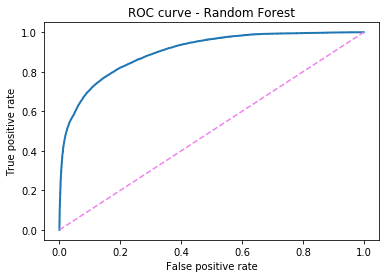

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Random Forest');
print("ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

### Logistic Regression

In [42]:
lm = LogisticRegression(solver='liblinear',class_weight='balanced')

In [43]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
metricslist(lm)

Accuracy 0.8258601719664761
Precision 0.5930361499223775
Recall 0.7857772553629151
F1 0.6759352881698687


In [45]:
skmetrics(lm)

ROC_AUC:  0.8118431185301609
Accuracy:  0.8258601719664761
Precision:  0.5930361499223775
Recall:  0.7857772553629151


ROC AUC score =  0.9010191388365606


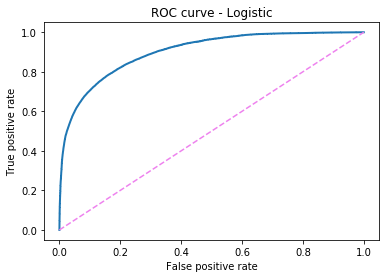

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Logistic');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))

#### Scale and Find Coefficients

In [47]:
def metricslist_scaled(modelfunction):
    cm_test = confusion_matrix(y_test, modelfunction.predict(X_test_scaled))
    tn = cm_test[0,0]
    tp = cm_test[1,1]
    fn = cm_test[1,0]
    fp = cm_test[0,1]
    acc = (tp + tn)/(tp + tn + fp + fn)
    prec = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1 = 2 * (prec*recall)/(prec + recall)
    print("Accuracy",acc)
    print("Precision",prec)
    print("Recall",recall)
    print("F1",f1)

In [48]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)
lm_s = LogisticRegression(solver='liblinear',class_weight='balanced')
lm_s.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
metricslist_scaled(lm_s)

Accuracy 0.82554775261821
Precision 0.5924317617866005
Recall 0.7857772553629151
F1 0.6755425308844706


In [51]:
coef = pd.DataFrame(lm_s.coef_)
coef = coef.transpose()
coef = coef.rename(columns={0:'coef'})
coef['cols'] = pd.DataFrame(X.columns)
coef['coef_exp'] = coef.coef.apply(np.exp)

In [52]:
coef.sort_values(by = 'coef_exp').head(20)
# predict discharge

,coef,cols,coef_exp
54,-1.103048,esi_4.0,0.331858
55,-0.878486,esi_5.0,0.415411
2,-0.288299,n_edvisits,0.749538
32,-0.226172,cc_motorvehiclecrash,0.797581
30,-0.216720,cc_alcoholintoxication,0.805155
53,-0.129928,esi_3.0,0.878159
60,-0.116811,previousdispo_Discharge,0.889753
33,-0.101986,cc_sorethroat,0.903042
46,-0.095311,ekg_count,0.909090
56,-0.073067,gender_Female,0.929538


In [53]:
coef.sort_values(by = 'coef_exp').tail(20)
# predict admission

,coef,cols,coef_exp
16,0.076402,meds_antiplateletdrugs,1.079396
27,0.078835,cc_shortnessofbreath,1.082025
20,0.109236,meds_elect/caloric/h2o,1.115426
59,0.110427,previousdispo_Admit,1.116755
43,0.110907,triage_vital_temp,1.117291
17,0.116935,meds_cardiacdrugs,1.124046
19,0.126746,meds_diuretics,1.135129
58,0.153608,arrivalmode_ambulance,1.166034
15,0.156789,meds_antihyperglycemics,1.169749
24,0.191664,cc_abdominalpain,1.211264


#### Change Threshold

In [54]:
def score_threshold(THRESHOLD):
    preds = np.where(lm.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
    cm_test = (confusion_matrix(y_test, preds))
    tn = cm_test[0,0]
    tp = cm_test[1,1]
    fn = cm_test[1,0]
    fp = cm_test[0,1]
    acc = (tp + tn)/(tp + tn + fp + fn)
    prec = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1 = 2 * (prec*recall)/(prec + recall)
    print("Accuracy",acc)
    print("Precision",prec)
    print("Recall",recall)
    print("F1",f1)

In [55]:
score_threshold(.5)

Accuracy 0.8258601719664761
Precision 0.5930361499223775
Recall 0.7857772553629151
F1 0.6759352881698687


In [56]:
score_threshold(.6)

Accuracy 0.8560018473491897
Precision 0.6837611735044694
Recall 0.7013223626212166
F1 0.6924304407114051


In [57]:
score_threshold(.65)

Accuracy 0.8643285021529769
Precision 0.7272198150423592
Recall 0.6608874522480165
F1 0.6924687480756204
